In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
%matplotlib inline


In [19]:
data = pd.read_csv('titanic_train.csv')
data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [4]:
data = data.drop(['name','ticket','cabin','boat','body','home.dest'], axis=1)              #removing these features

In [5]:
data = data.fillna(data.mean())


/tmp/ipykernel_22763/1711871313.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


In [6]:
data.head()

,passenger_id,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1216,3,female,29.519847,0,0,7.7333,Q,1
1,699,3,male,38.000000,0,0,8.6625,S,0
2,1267,3,female,30.000000,1,1,24.1500,S,0
3,449,2,female,54.000000,1,3,23.0000,S,1
4,576,2,male,40.000000,0,0,13.0000,S,0


In [7]:
sex_map = {'male': 0, 'female': 1}
embarked_map = {'S': 0, 'C': 1, 'Q': 2}

data['sex'] = data['sex'].map(sex_map)
data['embarked'] = data['embarked'].map(embarked_map)

In [8]:
mode_embarked = data['embarked'].mode()[0] 
data['embarked'].fillna(mode_embarked, inplace=True)  


In [9]:
scaler = StandardScaler()

num_cols = ['age', 'sibsp', 'parch', 'fare']
data[num_cols] = scaler.fit_transform(data[num_cols])


In [10]:
X = data.drop('survived', axis=1)
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [11]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8,6), max_iter=1000, random_state=1)
mlp.fit(X_train, y_train)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(8, 6), max_iter=1000,
              random_state=1, solver='lbfgs')

In [12]:
y_pred = mlp.predict(X_test)

In [13]:
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy score: 0.7764705882352941
Precision score: 0.7272727272727273
Recall score: 0.5517241379310345
F1 score: 0.6274509803921569


In [14]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8,8), max_iter=1000, random_state=1)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)


In [15]:

print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))



Accuracy score: 0.7647058823529411
Precision score: 0.6956521739130435
Recall score: 0.5517241379310345
F1 score: 0.6153846153846154


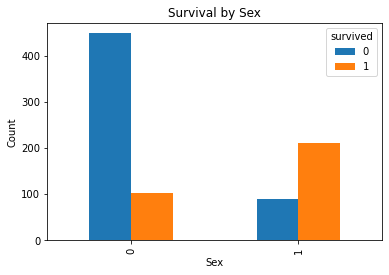

In [17]:

survival_by_sex = data.groupby(['sex', 'survived']).size().unstack()

survival_by_sex.plot(kind='bar', stacked=False)

plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.show()
